# 安裝套件

In [0]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 108kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=4c4dcc5f4195f05caeb131d123888c92e16c1d01918bef3725db06ff4867fa73
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


# 檢視圖片

新垣結衣: [-4.50691860e-03  1.41885489e-01  4.50192839e-02 -6.13696165e-02
 -1.34090155e-01  1.92342978e-02 -7.26302713e-02 -4.26254310e-02
  1.51357651e-01 -1.33009255e-01  2.06999674e-01 -9.46988538e-02
 -2.68809199e-01 -1.00634880e-02 -1.22404974e-02  2.38992482e-01
 -1.83183834e-01 -1.89129129e-01 -4.52035815e-02  4.16773930e-02
  8.67699757e-02  7.45016560e-02  1.19524300e-02  4.29356955e-02
 -9.30259377e-02 -3.23895276e-01 -8.87960047e-02 -3.88590060e-02
 -1.37446765e-02 -1.37012526e-01 -2.26677489e-02  1.86027475e-02
 -1.39890760e-01 -2.17710249e-03  9.99354273e-02  1.14188388e-01
 -6.03335686e-02 -1.57399178e-01  1.60509676e-01 -3.52417678e-03
 -3.47548217e-01  4.21856940e-02  1.27744675e-01  2.29333594e-01
  1.79203883e-01  3.04770153e-02 -2.83651147e-02 -1.58049926e-01
  9.29278135e-02 -2.04267591e-01  6.88504204e-02  1.78673372e-01
  7.19066709e-02  1.28818899e-01  3.11388001e-02 -1.68277726e-01
  2.93634348e-02  1.54423565e-01 -1.22748487e-01 -3.36111523e-02
  1.19070210e-01 -1

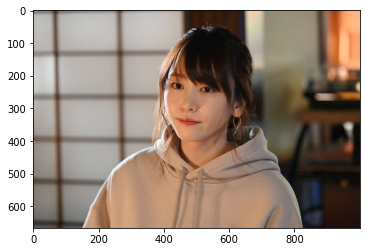

In [0]:
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline

img = face_recognition.load_image_file("01.jpg")
en = face_recognition.face_encodings(img)
print("新垣結衣:", en[0])
plt.imshow(img)

# 照片讀取

In [0]:
import glob
subs = ["jpg", "png", "jpeg"]

names, encodings = [], []
for fn in glob.glob("*"):
    sub = fn.split(".")[-1]
    if sub.lower() in subs:
        n = fn.split(".")[0]
        names.append(n)
        img = face_recognition.load_image_file(fn)
        en = face_recognition.face_encodings(img)[0]
        encodings.append(en)
print(names)
print(encodings)

['彭于晏', '陳奕迅', '新垣結衣', '蔡英文']
[array([-0.03678975,  0.17052779,  0.04243924, -0.02710208, -0.061103  ,
        0.00097502, -0.11207134, -0.09625414,  0.12834851, -0.08645663,
        0.21938559, -0.07376134, -0.21402597, -0.03026531, -0.06221122,
        0.19052488, -0.22067153, -0.08381151, -0.04794393,  0.02535046,
        0.0068851 ,  0.07085163,  0.02122261,  0.03320016, -0.14329705,
       -0.22480233, -0.09676793, -0.12276636, -0.05387431, -0.09166008,
       -0.07836284,  0.00066879, -0.1693196 , -0.05453913,  0.01943279,
        0.01590196, -0.03011974, -0.06605808,  0.18159713,  0.05745132,
       -0.22518452,  0.09655774,  0.03819704,  0.29030612,  0.20553331,
        0.04886105, -0.02883589, -0.16878122,  0.12991883, -0.18295155,
        0.11722502,  0.11850564,  0.11392602,  0.0732846 ,  0.0134064 ,
       -0.11693493,  0.0672517 ,  0.09872332, -0.11506876,  0.01880213,
        0.15472518,  0.00845865,  0.03024791, -0.01890218,  0.19072522,
        0.06421639, -0.09030272, 

# 輸入圖片網址，進行圖片分析

請輸入網址:http://static.ettoday.net/images/924/924104.jpg
跟 彭于晏 的距離: 0.5681994309625107
跟 陳奕迅 的距離: 0.7107883508065952
跟 新垣結衣 的距離: 0.48490149250656533
跟 蔡英文 的距離: 0.7154834743056447
應該是: 新垣結衣
--------------------------------------------------


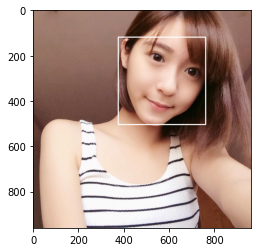

In [0]:
import requests
import cv2

url = input("請輸入網址:")
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)

ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)

for top, right, bottom, left in locs:
    # 圖片, 左上座標, 右下座標, 顏色, 粗細
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 4)

for en in ens:
    distances = face_recognition.face_distance(en, encodings)
    for n, d in zip(names, distances):
        print("跟", n, "的距離:", d)
    idx = distances.argmin(axis=-1)
    print("應該是:", names[idx])
    print("-" * 50)

plt.imshow(img)